<a href="https://colab.research.google.com/github/Andreaierardi/SocialNetworkAnalysis-project/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Analysis Project**

> ## **University of Milan** - **DataScience and Economics**

<br>

#### Author : **Andrea Ierardi**

<br>


---




 <br>






## Dataset
### Description

Data collected about Facebook pages (November 2017). These datasets represent blue verified Facebook page networks of different categories. Nodes represent the pages and edges are mutual likes among them.








 <br>






In [607]:
import pandas as pd
nodes = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.csv',sep=";")

edges = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.edges')


In [608]:
edges

,source,target
0,0,276
1,0,58
2,0,132
3,0,603
4,0,398
...,...,...
2097,597,611
2098,601,603
2099,601,616
2100,603,616


In [609]:
nodes

,name,id
0,Josh Marks,386
1,Blue Ribbon Restaurants,473
2,Pat Neely,1
3,La Griglia,542
4,Jose Garces,189
...,...,...
615,Jumia Food,163
616,Luke Thomas,381
617,Clodagh McKenna,140
618,Chef Michelle Bernstein,157


In [610]:
from collections import Counter # Counter counts the number of occurrences of each item
from itertools import tee, count
def uniquify(seq, suffs = count(1)):
    """Make all the items unique by adding a suffix (1, 2, etc).

    `seq` is mutable sequence of strings.
    `suffs` is an optional alternative suffix iterable.
    """
    not_unique = [k for k,v in Counter(seq).items() if v>1] # so we have: ['name', 'zip']
    # suffix generator dict - e.g., {'name': <my_gen>, 'zip': <my_gen>}
    suff_gens = dict(zip(not_unique, tee(suffs, len(not_unique))))  
    for idx,s in enumerate(seq):
        try:
            suffix = str(next(suff_gens[s]))
        except KeyError:
            # s was unique
            continue
        else:
            seq[idx] += suffix
    

In [611]:
names = list(nodes.name)
uniquify(names, (f'_{x!s}' for x in range(1, 100)))
names[0:10]

['Josh Marks',
 'Blue Ribbon Restaurants',
 'Pat Neely',
 'La Griglia',
 'Jose Garces',
 'Zac Kara',
 'Big Fish Seafood Bistro_1',
 'Tom Aikens',
 'The Habit Burger Grill',
 'Chef Sheldon Simeon']

In [612]:
# Find the name of the column by index
n = nodes.columns[0]

# Drop that column
nodes.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
nodes[n] = names

list(nodes.name)[0:20]

['Josh Marks',
 'Blue Ribbon Restaurants',
 'Pat Neely',
 'La Griglia',
 'Jose Garces',
 'Zac Kara',
 'Big Fish Seafood Bistro_1',
 'Tom Aikens',
 'The Habit Burger Grill',
 'Chef Sheldon Simeon',
 'Ochikeron',
 'Taco Bell Cyprus',
 'Christophe Michalak',
 "Peohe's",
 'Destino Ibiza',
 'KFC_1',
 'Chef Shirley Chung',
 'Doug Adams',
 'משה שגב / Moshe Segev',
 'Angel Leon Gonzalez']

In [613]:
# Nodes as dictionary
nodes_dict = {}
for (n, id) in zip(nodes["name"],nodes["id"]):
 # print(n, "+", id)
  nodes_dict[id] = n

In [614]:
list(nodes_dict.values())[0:20]

['Josh Marks',
 'Blue Ribbon Restaurants',
 'Pat Neely',
 'La Griglia',
 'Jose Garces',
 'Zac Kara',
 'Big Fish Seafood Bistro_1',
 'Tom Aikens',
 'The Habit Burger Grill',
 'Chef Sheldon Simeon',
 'Ochikeron',
 'Taco Bell Cyprus',
 'Christophe Michalak',
 "Peohe's",
 'Destino Ibiza',
 'KFC_1',
 'Chef Shirley Chung',
 'Doug Adams',
 'משה שגב / Moshe Segev',
 'Angel Leon Gonzalez']


 <br>





## Network Building



In [615]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

In [616]:
G = nx.Graph()

for e in edges.values.tolist():
  G.add_edge(e[0],e[1])

In [617]:
H = nx.relabel_nodes(G, nodes_dict)
len(sorted(H))

G = H

In [618]:
print('Number of nodes: {} - Number of links:{}'.format(G.order(),G.size()))


Number of nodes: 620 - Number of links:2102


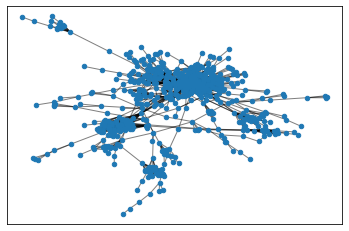

In [619]:
#nx.draw_networkx(H,)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
nx.draw_networkx_nodes(G, pos, node_size=20, label = list(G.nodes()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()



 <br>

# Degree Analysis

In [620]:
list(G.nodes())[0:20]

['Lee Anne Wong',
 'KFC_3',
 'Chef Jamie Gwen',
 'Madison Cowan',
 'Elizabeth Karmel',
 'KFC_22',
 'KFC_8',
 'Pat Neely',
 'Logan Junior Chef',
 'Robin Miller',
 'Ben Sargent & Dr. Klaw',
 'Bobby Flay',
 'Chuck Hughes',
 'Chef Carlo Cracco',
 'Pasqualino Barbasso',
 'Alessandro Borghese',
 'Chef Hirohiko Shoda',
 'Alain Ducasse',
 'Christian Bau',
 'Andy Luotto']

In [621]:
density = nx.density(G)
print('Density: {}'.format(density))

Density: 0.0109541925061233


In [622]:
degree = list(dict(G.degree()).values())
degree[0:20]

[6, 11, 15, 2, 27, 9, 17, 2, 134, 47, 3, 31, 11, 10, 7, 10, 7, 19, 7, 3]

In [623]:
print('Standard deviation: {}'.format(np.std(degree)))
print('Mean: {}'.format(np.mean(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))


print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(G)))

Standard deviation: 9.46914920573866
Mean: 6.780645161290322
Median: 4.0
Min: 1
Max: 134
Assortativity coefficient: -0.028203795222469928



 <br>

### ECDF

Text(0, 0.5, 'ECDF Food')

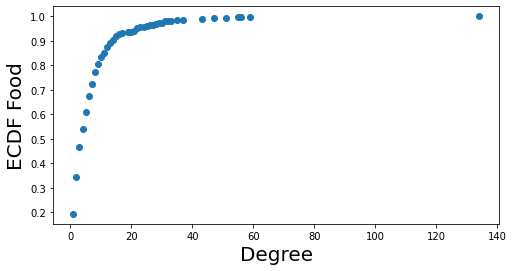

In [624]:
# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)

Text(0, 0.5, 'ECDF Food')

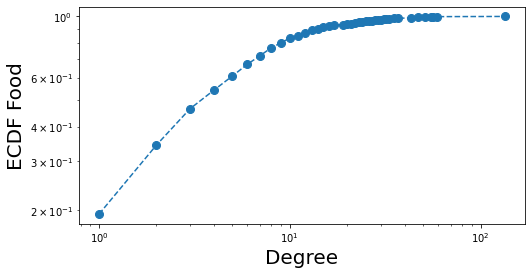

In [625]:

# ECDF loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)


Text(0, 0.5, 'ECCDF FOOD')

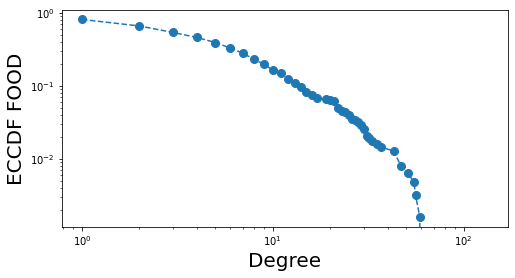

In [626]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF FOOD', size = 20)

In [627]:
p = density
random_graph = nx.fast_gnp_random_graph(G.order(),p)


In [628]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 620
Number of links: 2095


In [629]:
random_degree = list(dict(random_graph.degree()).values())
print('Random Net Standard deviation: {}'.format(np.std(random_degree)))
print('Random Net Mean: {}'.format(np.mean(random_degree)))
print('Random Net Median: {}'.format(np.median(random_degree)))
print('Random Net Min: {}'.format(np.min(random_degree)))
print('Random Net Max: {}'.format(np.max(random_degree)))

Random Net Standard deviation: 2.5933257005987618
Random Net Mean: 6.758064516129032
Random Net Median: 7.0
Random Net Min: 0
Random Net Max: 15


Text(0, 0.5, 'ECCDF')

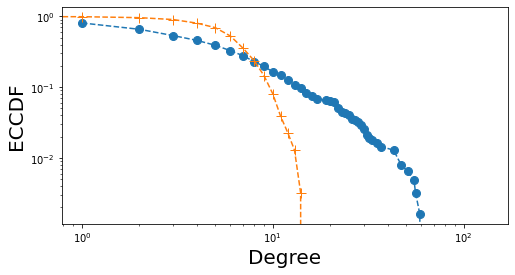

In [630]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)


 <br>

## HUBS

In [631]:
percentile_99 = np.percentile(degree,99)
print(percentile_99)

47.0


In [632]:
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_99]


In [633]:
print(len(hub_nodi))
print(list(hub_nodi))

8
['Logan Junior Chef', 'Robin Miller', 'Scott Conant', "McDonald's_6", 'Eric Ripert', 'Alex Guarnaschelli', 'David Chang', 'Chef Daniel Boulud']


In [634]:
print(list(nx.isolates(G)))


[]


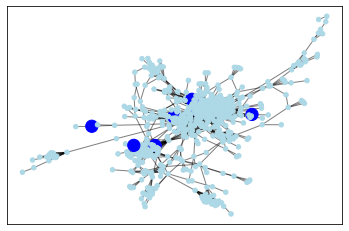

In [635]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
color_map = []
size_map = []
for i in range(0, len(names)):
    if not (names[i] in hub_nodi) :
        color_map.append('lightblue')
        size_map.append(20)
    else: 
        color_map.append('blue')
        size_map.append(150)
nx.draw_networkx_nodes(G, pos, node_size=size_map
                       , node_color=color_map)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


 <br>

## Connectivity

In [637]:
print(nx.is_connected(G))
print(nx.number_connected_components(G))

True
1


In [638]:
nx.number_connected_components(G)

1

In [639]:
#dir(G)

In [668]:
len(nx.triangles(G))

620


 <br>

## Clusters

In [642]:
clusters = nx.average_clustering(G)
clusters

0.3308970263553271

In [643]:
type(clusters)

float

In [644]:
nx.transitivity(G)


0.22264084150905228

In [645]:
local_cluster = nx.clustering(G)
sorted(local_cluster.items(), key=lambda item: item[1], reverse= True)[0:20]


[('Pat Neely', 1.0),
 ('Ben Sargent & Dr. Klaw', 1.0),
 ('Jumia Food_6', 1.0),
 ("Chili's México", 1.0),
 ('Taco Bell El Salvador', 1.0),
 ('KFC_17', 1.0),
 ("Domino's Pizza_11", 1.0),
 ('Delverde_1', 1.0),
 ('Delverde_3', 1.0),
 ("Nando's_12", 1.0),
 ("Nando's_8", 1.0),
 ("McDonald's Deutschland Karriere", 1.0),
 ("McDonald's_37", 1.0),
 ("McDonald's_8", 1.0),
 ("McDonald's_11", 1.0),
 ('Valentin Neraudeau', 1.0),
 ('Chef Aaron McCargo Jr', 1.0),
 ('Al Brown New Zealand Chef', 1.0),
 ('Princi', 1.0),
 ('ad hoc & addendum', 1.0)]

In [646]:
triangle = nx.triangles(G)
list(triangle.items())[0:20]

[('Lee Anne Wong', 4),
 ('KFC_3', 13),
 ('Chef Jamie Gwen', 36),
 ('Madison Cowan', 0),
 ('Elizabeth Karmel', 88),
 ('KFC_22', 15),
 ('KFC_8', 25),
 ('Pat Neely', 1),
 ('Logan Junior Chef', 461),
 ('Robin Miller', 166),
 ('Ben Sargent & Dr. Klaw', 3),
 ('Bobby Flay', 94),
 ('Chuck Hughes', 11),
 ('Chef Carlo Cracco', 10),
 ('Pasqualino Barbasso', 6),
 ('Alessandro Borghese', 15),
 ('Chef Hirohiko Shoda', 3),
 ('Alain Ducasse', 28),
 ('Christian Bau', 6),
 ('Andy Luotto', 2)]


 <br>

## Centrality



In [647]:
deg_centr = nx.degree_centrality(G)


In [648]:
eigen = nx.eigenvector_centrality(G)
#eigen

In [649]:
pagerank = nx.pagerank(G)
#pagerank

In [650]:
betweenesCentrality = nx.betweenness_centrality(G)
#betweenesCentrality


 <br>

## Communities


In [651]:
import networkx.algorithms.community as nx_comm

import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G))
print(list_community_sets_greedy[0:20])

[frozenset({'Chef Sue Zemanick', 'Guga Rocha', 'Magnum_2', 'Chef Kiran Jethwa', 'Melissa King', 'Jehangir', 'The Tuscan Gun', 'José Andrés', "Dunkin' Donuts_9", 'Chef Charlie Palmer', 'Red Robin Gourmet Burgers', 'Marcus Samuelsson', 'Johnny Iuzzini', 'Virginia Willis', 'Camille Becerra', 'Blue Ribbon Restaurants', 'Chef Robert Irvine', 'Kirti Bhoutika', 'Dining with Flynn', 'Michel Nischan', 'Chef Rick Tramonto', 'Hugh Acheson', 'Dean Sheremet', 'Five Guys_1', 'Tim Love', 'Michael Lomonaco', 'Josh Elkin', 'Nyesha Arrington', 'Tom Aikens', 'Douglas Keane', 'Martín Berasategui', 'Fabio Viviani', 'Robin Miller', 'Marc Forgione', 'Harlem EatUp', 'Michael White', 'Marcel Vigneron', 'Pablo Massey', 'Cesare Casella', 'João Alcantara', 'Chef Jennifer Carroll', 'Maneet Chauhan', 'Bradley Ogden', 'Jose Garces', 'Suzanne Goin', 'Chef Mark Garcia', 'Gavin Kaysen', 'Samin Nosrat', "Bobby's Burger Palace", 'John DeLucie', 'Narda Lepes', 'Sang Yoon', 'Matthew Kenney', 'Dani García', 'Chef Michael Fe

In [652]:
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print("Number of elems",len(comm))
    for n in comm:
        partition_greedy[n]=i

Community: 0
Number of elems 164
Community: 1
Number of elems 72
Community: 2
Number of elems 53
Community: 3
Number of elems 46
Community: 4
Number of elems 37
Community: 5
Number of elems 36
Community: 6
Number of elems 33
Community: 7
Number of elems 31
Community: 8
Number of elems 31
Community: 9
Number of elems 30
Community: 10
Number of elems 17
Community: 11
Number of elems 17
Community: 12
Number of elems 13
Community: 13
Number of elems 6
Community: 14
Number of elems 6
Community: 15
Number of elems 6
Community: 16
Number of elems 5
Community: 17
Number of elems 5
Community: 18
Number of elems 5
Community: 19
Number of elems 3
Community: 20
Number of elems 2
Community: 21
Number of elems 2


In [653]:
print(list(partition_greedy.items())[0:20])

[('Chef Sue Zemanick', 0), ('Guga Rocha', 0), ('Magnum_2', 0), ('Chef Kiran Jethwa', 0), ('Melissa King', 0), ('Jehangir', 0), ('The Tuscan Gun', 0), ('José Andrés', 0), ("Dunkin' Donuts_9", 0), ('Chef Charlie Palmer', 0), ('Red Robin Gourmet Burgers', 0), ('Marcus Samuelsson', 0), ('Johnny Iuzzini', 0), ('Virginia Willis', 0), ('Camille Becerra', 0), ('Blue Ribbon Restaurants', 0), ('Chef Robert Irvine', 0), ('Kirti Bhoutika', 0), ('Dining with Flynn', 0), ('Michel Nischan', 0)]


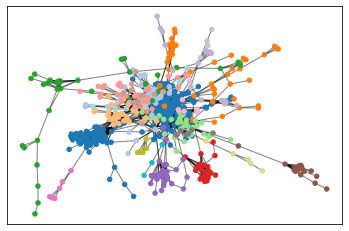

In [654]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_greedy.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition_greedy.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition_greedy.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [655]:
partition_library = community_louvain.best_partition(G)

In [656]:
print(list(partition_library.items())[0:20])

[('Lee Anne Wong', 0), ('KFC_3', 0), ('Chef Jamie Gwen', 1), ('Madison Cowan', 0), ('Elizabeth Karmel', 1), ('KFC_22', 0), ('KFC_8', 0), ('Pat Neely', 1), ('Logan Junior Chef', 1), ('Robin Miller', 1), ('Ben Sargent & Dr. Klaw', 1), ('Bobby Flay', 1), ('Chuck Hughes', 1), ('Chef Carlo Cracco', 2), ('Pasqualino Barbasso', 2), ('Alessandro Borghese', 2), ('Chef Hirohiko Shoda', 2), ('Alain Ducasse', 3), ('Christian Bau', 2), ('Andy Luotto', 2)]


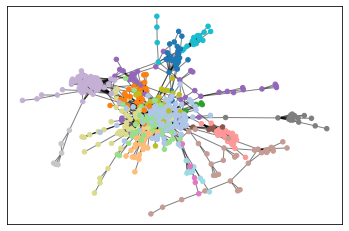

In [657]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition_library.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition_library.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [658]:
comms = set(partition_library.values())
comms



{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [659]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

In [660]:
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

list_community_sets_library[0:2]

[{"Carl's Jr.",
  "Carl's Jr. NZ",
  "Hardee's",
  'KFC_1',
  'KFC_10',
  'KFC_11',
  'KFC_12',
  'KFC_13',
  'KFC_14',
  'KFC_15',
  'KFC_16',
  'KFC_18',
  'KFC_19',
  'KFC_20',
  'KFC_22',
  'KFC_23',
  'KFC_24',
  'KFC_25',
  'KFC_26',
  'KFC_27',
  'KFC_3',
  'KFC_5',
  'KFC_6',
  'KFC_7',
  'KFC_8',
  'KFC_9',
  'Lee Anne Wong',
  'Madison Cowan',
  'Opry City Stage'},
 {'Aarón Sánchez',
  'Alex Guarnaschelli',
  'Aliya LeeKong',
  'Amy Thielen',
  'Angelo Sosa',
  'Anne Burrell',
  'Barbie Marshall',
  'Ben Sargent & Dr. Klaw',
  'Bobby Flay',
  "Bobby's Burger Palace",
  'Buddy Valastro',
  'Camille Becerra',
  'Cat Cora',
  'Cesare Casella',
  'Chef Aaron McCargo Jr',
  'Chef Adrianne',
  'Chef Alex Levin',
  'Chef Andrew Gruel',
  'Chef Ben Ford',
  'Chef Carla Hall',
  'Chef Carmen Gonzalez',
  'Chef Charlie Palmer',
  "Chef Claudia's Cocina",
  'Chef Cynthia Louise',
  'Chef Damaris Phillips',
  'Chef Dana Cohen HK',
  'Chef David Burke',
  'Chef Derrick Fox',
  'Chef Eliza

In [661]:
for my_list in [list_community_sets_greedy,  list_community_sets_library]:
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(G, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(G, my_list, weight='weight'))
    #print("Performance")
    print("Performance", nx_comm.performance(G, my_list))
    
    print("---")

Coverage 0.8686964795432921
Modularity 0.6331957195403588
Performance 0.8936682474334254
---
Coverage 0.8116079923882017
Modularity 0.6436223351237232
Performance 0.9031684819427798
---


In [662]:


pairs = []
for i, nod in enumerate(list_community_sets_library):
    print(i,len(nod))
    comm_size = (i,len(nod))
    pairs.append(comm_size)



0 29
1 141
2 37
3 30
4 4
5 74
6 31
7 37
8 71
9 6
10 34
11 5
12 17
13 6
14 23
15 44
16 21
17 10


In [663]:
pairs

[(0, 29),
 (1, 141),
 (2, 37),
 (3, 30),
 (4, 4),
 (5, 74),
 (6, 31),
 (7, 37),
 (8, 71),
 (9, 6),
 (10, 34),
 (11, 5),
 (12, 17),
 (13, 6),
 (14, 23),
 (15, 44),
 (16, 21),
 (17, 10)]

In [664]:
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)



Text(0, 0.5, 'Number of nodes')

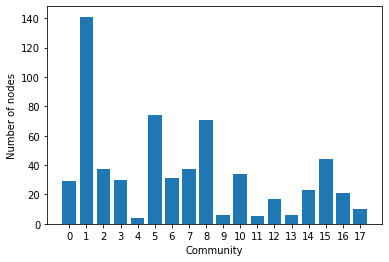

In [665]:
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")